<a href="https://colab.research.google.com/github/shabayadletzh/bonus_hot_dog/blob/main/bonus_hot_dog_as17609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pretrained Models in an app

This problem is motivated by the Silicon Valley sketch.  Your goal is to build a similar app with a fine tuned model from torchvision deployed through a streamlit.

In [ ]:
from IPython.display import YouTubeVideo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

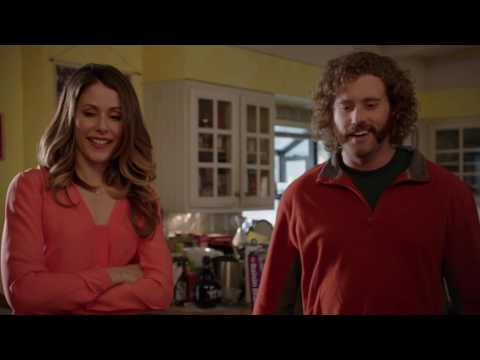

In [ ]:
YouTubeVideo(id = 'tWwCK95X6go')

Today we will use a dataset to determine whether or not an image is a hotdog.  Dataset link: [link](https://drive.google.com/drive/folders/1d2SelwjIGAtYnui_yczzaTL61eF_oLH_?usp=sharing)

**BEGINNING**: To get started, create a basic streamlit app that accepts an image from the user and displays it on the screen.

In [ ]:
ls

sample_data/


In [ ]:
test_path = '/content/drive/MyDrive/hotdogs/data/hotdog-nothotdog/test/hotdog/1501.jpg'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imread(test_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/hotdogs/data/hotdog-nothotdog/test/hotdog/1501.jpg'

#### Pretrained Models

An example of a pretrained model is that of the ResNet through `torchvision.models`.  Below is an outline of a streamlit app to deploy the model. You should fine tune this model using the hot dog data and deploy a model that allows a user to take a picure with their camera or upload an image and returns a voice stating whether the image is a hot dog or not a hot dog.  How would you improve Jinyang's app to make the rest of the team happy?  (**HINT**: [this](https://huggingface.co/datasets/Codatta/MM-Food-100K))

**Example**: ResNet

- [link](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html)

```
import streamlit as st
import numpy as np
from torchvision.models import
import torch



st.header('Hot Dogs!')

uploaded_file = st.file_uploader("Pick a picture")
model = ''

if uploaded_file is not None:
    img = #load the image
    #prepare the image
    #pass through the model
    #make prediction
    #speak!
    
```

In [10]:
!pip install -q streamlit pyngrok transformers torch pillow gTTS

In [11]:
%%writefile app.py
import streamlit as st
from transformers import pipeline
from PIL import Image
from gtts import gTTS
import tempfile

# PAGE CONFIG
st.set_page_config(page_title="Smart Food Classifier", page_icon="🍔")

st.title("Smart Food Vision")
st.write("Upload a photo or use your camera. I will tell you what food it is.")

# LOAD THE MULTI-CLASS MODEL
# We use 'nateraw/food' which knows 101 different dishes (Sushi, Pizza, Steak, etc.)
@st.cache_resource
def load_model():
    return pipeline("image-classification", model="nateraw/food")

with st.spinner('Loading the AI Brain...'):
    classifier = load_model()

# INPUT METHOD SELECTION
tab1, tab2 = st.tabs(["Take Photo", "Upload File"])
image_to_process = None

with tab1:
    camera_photo = st.camera_input("Take a picture")
    if camera_photo:
        image_to_process = camera_photo

with tab2:
    uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "png", "jpeg"])
    if uploaded_file:
        image_to_process = uploaded_file

# PROCESSING LOGIC
if image_to_process is not None:
    # 1. Show the image
    image = Image.open(image_to_process)
    st.image(image, caption="Analyzing...", width=300)

    # 2. Run Inference
    predictions = classifier(image)
    top_result = predictions[0]

    # Clean up the label (e.g., "french_fries" -> "French Fries")
    raw_label = top_result['label']
    clean_label = raw_label.replace("_", " ").title()
    score = top_result['score']

    # 3. Display Result
    st.success(f"Result: **{clean_label}**")
    st.caption(f"Confidence: {int(score * 100)}%")

    # 4. GENERATE VOICE (Text-to-Speech)
    # The voice will say "This looks like [Food Name]"
    speech_text = f"This looks like {clean_label}"
    tts = gTTS(text=speech_text, lang='en')

    # Save and play audio
    with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as fp:
        tts.save(fp.name)
        st.audio(fp.name, format="audio/mp3")

Overwriting app.py


In [12]:
import subprocess
from pyngrok import ngrok
import time


NGROK_TOKEN = "375aP5Up68x0jY4uCCaqCxDIFqy_2F5VKEJKQmBX7QzJC6uZq"

# 1. Authenticate
ngrok.set_auth_token(NGROK_TOKEN)

# 2. Kill old processes
subprocess.run(["pkill", "-f", "streamlit"])

# 3. Start Streamlit (Camera requires HTTPS, which ngrok provides)
process = subprocess.Popen([
    "streamlit", "run", "app.py",
    "--server.port", "8501",
    "--server.enableCORS", "false",
    "--server.enableXsrfProtection", "false"
])

# 4. Wait for server to start
time.sleep(5)

# 5. Connect
try:
    public_url = ngrok.connect(8501).public_url
    print(f"\nCLICK HERE TO OPEN THE APP: {public_url}")
except Exception as e:
    print(f"Error: {e}")


CLICK HERE TO OPEN THE APP: https://rackety-madilynn-cheeriest.ngrok-free.dev
